In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df= pd.read_csv('train.csv')
df.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,26-01-2021 02:21,556753,26-01-2021 00:00,26-01-2021 02:21,26-01-2021 02:22,26-01-2021 02:32,26-01-2021 02:49,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,26-01-2021 02:33,556754,26-01-2021 00:00,26-01-2021 02:33,26-01-2021 02:34,26-01-2021 02:50,26-01-2021 03:11,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,26-01-2021 02:39,556755,26-01-2021 00:00,26-01-2021 02:39,26-01-2021 02:40,26-01-2021 02:56,26-01-2021 03:12,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,26-01-2021 02:47,556756,26-01-2021 00:00,26-01-2021 02:48,26-01-2021 02:49,26-01-2021 03:21,26-01-2021 03:41,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,26-01-2021 03:06,556757,26-01-2021 00:00,26-01-2021 03:07,26-01-2021 03:07,26-01-2021 03:31,26-01-2021 04:00,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_time            450000 non-null  object 
 1   order_id              450000 non-null  int64  
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   pickup_time           447579 non-null  object 
 6   delivered_time        444782 non-null  object 
 7   rider_id              450000 non-null  int64  
 8   first_mile_distance   450000 non-null  float64
 9   last_mile_distance    450000 non-null  float64
 10  alloted_orders        433052 non-null  float64
 11  delivered_orders      432659 non-null  float64
 12  cancelled             450000 non-null  int64  
 13  undelivered_orders    432659 non-null  float64
 14  lifetime_order_count  449947 non-null  float64
 15  

In [ ]:
df.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                157
pickup_time               2421
delivered_time            5218
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
cancelled                    0
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
cancelled_time          444782
dtype: int64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


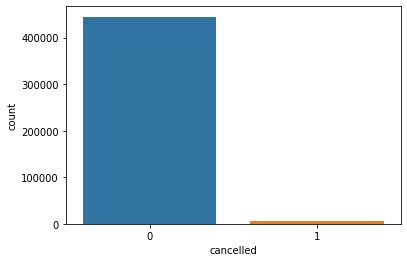

In [ ]:
sns.countplot('cancelled',data=df)

In [ ]:
#cleaning

df_notneed = ['order_id']

df_no_test = ['pickup_time','delivered_time','cancelled_time']
 
df_time_cols=['order_time','allot_time','accept_time']

In [ ]:
#conversion
def conversion(df):
    df['order_time']=pd.to_datetime(df['order_time'],errors = 'coerce')
    df['allot_time']=pd.to_datetime(df['allot_time'],errors = 'coerce')
    df['accept_time']=pd.to_datetime(df['accept_time'],errors = 'coerce')
    df['pickup_time']=pd.to_datetime(df['pickup_time'],errors = 'coerce')
    df['delivered_time']=pd.to_datetime(df['delivered_time'],errors = 'coerce')

    return df

In [ ]:
df = conversion(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  datetime64[ns]
 1   order_id              450000 non-null  int64         
 2   order_date            450000 non-null  object        
 3   allot_time            450000 non-null  datetime64[ns]
 4   accept_time           449843 non-null  datetime64[ns]
 5   pickup_time           447579 non-null  datetime64[ns]
 6   delivered_time        444782 non-null  datetime64[ns]
 7   rider_id              450000 non-null  int64         
 8   first_mile_distance   450000 non-null  float64       
 9   last_mile_distance    450000 non-null  float64       
 10  alloted_orders        433052 non-null  float64       
 11  delivered_orders      432659 non-null  float64       
 12  cancelled             450000 non-null  int64         
 13 

In [ ]:
df['accept_time'].fillna(value=-1)
df.allot_time.isnull().sum()

0

In [ ]:
for i in range(len(df)): 
    if pd.isna(df['alloted_orders'][i]) and pd.isna(df['delivered_orders'][i]) and pd.isna(df['undelivered_orders'][i]):
       df['alloted_orders'][i]=df['delivered_orders'][i]=-1
       df['undelivered_orders'][i]=1
    elif pd.isna(df['delivered_orders'][i]) and pd.isna(df['undelivered_orders'][i]):
       df['undelivered_orders'][i]=df['alloted_orders'][i]
       df['delivered_orders'][i]=0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
 #reassignment columns 

df.reassigned_order = df['reassigned_order'].fillna(value = 0)
df.reassignment_method = df.reassignment_method.fillna(value = 'none')
df.reassignment_reason = df.reassignment_reason.fillna(value = 'none')

df


,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:00,556753,26-01-2021 00:00,2021-01-26 02:21:00,2021-01-26 02:22:00,2021-01-26 02:32:00,2021-01-26 02:49:00,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,none,none,0.0,NaN,NaN
1,2021-01-26 02:33:00,556754,26-01-2021 00:00,2021-01-26 02:33:00,2021-01-26 02:34:00,2021-01-26 02:50:00,2021-01-26 03:11:00,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,none,none,0.0,3.266667,NaN
2,2021-01-26 02:39:00,556755,26-01-2021 00:00,2021-01-26 02:39:00,2021-01-26 02:40:00,2021-01-26 02:56:00,2021-01-26 03:12:00,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,none,none,0.0,9.816667,NaN
3,2021-01-26 02:47:00,556756,26-01-2021 00:00,2021-01-26 02:48:00,2021-01-26 02:49:00,2021-01-26 03:21:00,2021-01-26 03:41:00,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,none,none,0.0,17.533333,NaN
4,2021-01-26 03:06:00,556757,26-01-2021 00:00,2021-01-26 03:07:00,2021-01-26 03:07:00,2021-01-26 03:31:00,2021-01-26 04:00:00,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,none,none,0.0,1.350000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-06-02 10:03:00,130226,06-02-2021 00:00,2021-06-02 10:03:00,2021-06-02 10:04:00,2021-06-02 10:27:00,2021-06-02 10:44:00,1006,0.5789,0.19,4.0,4.0,0,0.0,127.0,none,none,0.0,369.516667,NaN
449996,2021-06-02 10:03:00,130227,06-02-2021 00:00,2021-06-02 10:03:00,2021-06-02 10:04:00,2021-06-02 10:22:00,2021-06-02 10:31:00,279,1.9863,1.19,81.0,81.0,0,0.0,105.0,none,none,0.0,239.133333,NaN
449997,2021-06-02 10:03:00,130228,06-02-2021 00:00,2021-06-02 10:04:00,2021-06-02 10:04:00,2021-06-02 10:19:00,2021-06-02 10:26:00,3161,1.5944,1.61,28.0,28.0,0,0.0,1488.0,none,none,0.0,204.150000,NaN
449998,2021-06-02 10:03:00,130229,06-02-2021 00:00,2021-06-02 10:03:00,2021-06-02 10:05:00,2021-06-02 10:20:00,2021-06-02 10:30:00,9396,2.8939,4.68,72.0,72.0,0,0.0,105.0,none,none,0.0,65.583333,NaN


In [ ]:
#features need to be made too
def time_feat(df):
    df['order_allot']=(df['allot_time']-df['order_time']).apply( lambda x:x.total_seconds())
    df['allot_to_accept']=(df['accept_time']-df['allot_time']).apply( lambda x:x.total_seconds())

    return df

In [ ]:
df= time_feat(df)
df

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,...,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time,order_allot,allot_to_accept
0,2021-01-26 02:21:00,556753,26-01-2021 00:00,2021-01-26 02:21:00,2021-01-26 02:22:00,2021-01-26 02:32:00,2021-01-26 02:49:00,11696,1.5666,2.65,...,0,0.0,621.0,none,none,0.0,NaN,NaN,0.0,60.0
1,2021-01-26 02:33:00,556754,26-01-2021 00:00,2021-01-26 02:33:00,2021-01-26 02:34:00,2021-01-26 02:50:00,2021-01-26 03:11:00,18117,2.5207,2.76,...,0,0.0,105.0,none,none,0.0,3.266667,NaN,0.0,60.0
2,2021-01-26 02:39:00,556755,26-01-2021 00:00,2021-01-26 02:39:00,2021-01-26 02:40:00,2021-01-26 02:56:00,2021-01-26 03:12:00,18623,2.2074,4.80,...,0,0.0,66.0,none,none,0.0,9.816667,NaN,0.0,60.0
3,2021-01-26 02:47:00,556756,26-01-2021 00:00,2021-01-26 02:48:00,2021-01-26 02:49:00,2021-01-26 03:21:00,2021-01-26 03:41:00,15945,2.1894,6.38,...,0,0.0,127.0,none,none,0.0,17.533333,NaN,60.0,60.0
4,2021-01-26 03:06:00,556757,26-01-2021 00:00,2021-01-26 03:07:00,2021-01-26 03:07:00,2021-01-26 03:31:00,2021-01-26 04:00:00,17589,2.7870,4.01,...,0,0.0,84.0,none,none,0.0,1.350000,NaN,60.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,2021-06-02 10:03:00,130226,06-02-2021 00:00,2021-06-02 10:03:00,2021-06-02 10:04:00,2021-06-02 10:27:00,2021-06-02 10:44:00,1006,0.5789,0.19,...,0,0.0,127.0,none,none,0.0,369.516667,NaN,0.0,60.0
449996,2021-06-02 10:03:00,130227,06-02-2021 00:00,2021-06-02 10:03:00,2021-06-02 10:04:00,2021-06-02 10:22:00,2021-06-02 10:31:00,279,1.9863,1.19,...,0,0.0,105.0,none,none,0.0,239.133333,NaN,0.0,60.0
449997,2021-06-02 10:03:00,130228,06-02-2021 00:00,2021-06-02 10:04:00,2021-06-02 10:04:00,2021-06-02 10:19:00,2021-06-02 10:26:00,3161,1.5944,1.61,...,0,0.0,1488.0,none,none,0.0,204.150000,NaN,60.0,0.0
449998,2021-06-02 10:03:00,130229,06-02-2021 00:00,2021-06-02 10:03:00,2021-06-02 10:05:00,2021-06-02 10:20:00,2021-06-02 10:30:00,9396,2.8939,4.68,...,0,0.0,105.0,none,none,0.0,65.583333,NaN,0.0,120.0


In [ ]:
df['allot_to_accept']= df['allot_to_accept'].fillna(value=-1)
#df['allot_to_accept'].isnull().value_counts()

In [ ]:
df['ratio_allot_undel'] = df['undelivered_orders']/df['alloted_orders']

In [ ]:
df['session_time']=df.session_time.fillna(value=df['session_time'].median())

In [ ]:
df= df.drop(df_notneed,axis=1,inplace=True)
df= df.drop(df_no_test,axis=1)

In [ ]:
df.head()

,order_time,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,order_allot,allot_to_accept,ratio_allot_undel
0,2021-01-26 02:21:00,26-01-2021 00:00,2021-01-26 02:21:00,2021-01-26 02:22:00,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,none,none,0.0,175.550000,0.0,60.0,0.0
1,2021-01-26 02:33:00,26-01-2021 00:00,2021-01-26 02:33:00,2021-01-26 02:34:00,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,none,none,0.0,3.266667,0.0,60.0,0.0
2,2021-01-26 02:39:00,26-01-2021 00:00,2021-01-26 02:39:00,2021-01-26 02:40:00,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,none,none,0.0,9.816667,0.0,60.0,0.0
3,2021-01-26 02:47:00,26-01-2021 00:00,2021-01-26 02:48:00,2021-01-26 02:49:00,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,none,none,0.0,17.533333,60.0,60.0,0.0
4,2021-01-26 03:06:00,26-01-2021 00:00,2021-01-26 03:07:00,2021-01-26 03:07:00,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,none,none,0.0,1.350000,60.0,0.0,0.0


In [ ]:
df['ratio_allot_undel'].value_counts()

 0.000000    232686
-1.000000     16948
 0.020000      1184
 0.022222      1145
 0.018182      1139
              ...  
 0.091954         1
 0.034722         1
 0.079365         1
 0.079545         1
 0.002740         1
Name: ratio_allot_undel, Length: 1336, dtype: int64

In [ ]:
df['lifetime_order_count']=df['lifetime_order_count'].fillna(value = 0)

In [ ]:
df.isnull().sum()
#df[df['allot_to_accept']==-1].sum()
#df.info()

order_time                0
order_date                0
allot_time                0
accept_time             157
rider_id                  0
first_mile_distance       0
last_mile_distance        0
alloted_orders            0
delivered_orders          0
cancelled                 0
undelivered_orders        0
lifetime_order_count      0
reassignment_method       0
reassignment_reason       0
reassigned_order          0
session_time              0
order_allot               0
allot_to_accept           0
ratio_allot_undel         0
dtype: int64

In [ ]:
df.to_csv('clean2.csv')

CATEGORICAL+ENCODING

AFTER CLEAN FEAT ENG!

In [ ]:
data= pd.read_csv('clean2.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            450000 non-null  int64  
 1   order_time            450000 non-null  object 
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   rider_id              450000 non-null  int64  
 6   first_mile_distance   450000 non-null  float64
 7   last_mile_distance    450000 non-null  float64
 8   alloted_orders        450000 non-null  float64
 9   delivered_orders      450000 non-null  float64
 10  cancelled             450000 non-null  int64  
 11  undelivered_orders    450000 non-null  float64
 12  lifetime_order_count  450000 non-null  float64
 13  reassignment_method   450000 non-null  object 
 14  reassignment_reason   450000 non-null  object 
 15  

In [ ]:
data.reassignment_reason.value_counts()

none                                                                            436247
Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket      7212
Reassignment Request from SE portal.                                              5300
Reassign                                                                          1241
Name: reassignment_reason, dtype: int64

In [ ]:
#Categorical features

reassignment_method = pd.get_dummies(data['reassignment_method'])
#reassignment_reason = pd.get_dummies(data['reassignment_reason'],drop_first=True)
data.reassignment_reason = data['reassignment_reason'].map({'none':0,'Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket':1, 'Reassignment Request from SE portal.':2,'Reassign':3})

data = pd.concat([data,reassignment_method],axis=1)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            450000 non-null  int64  
 1   order_time            450000 non-null  object 
 2   order_date            450000 non-null  object 
 3   allot_time            450000 non-null  object 
 4   accept_time           449843 non-null  object 
 5   rider_id              450000 non-null  int64  
 6   first_mile_distance   450000 non-null  float64
 7   last_mile_distance    450000 non-null  float64
 8   alloted_orders        450000 non-null  float64
 9   delivered_orders      450000 non-null  float64
 10  cancelled             450000 non-null  int64  
 11  undelivered_orders    450000 non-null  float64
 12  lifetime_order_count  450000 non-null  float64
 13  reassignment_method   450000 non-null  object 
 14  reassignment_reason   450000 non-null  int64  
 15  

In [ ]:
data['order_date'] = pd.to_datetime(data['order_date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            450000 non-null  int64         
 1   order_time            450000 non-null  object        
 2   order_date            450000 non-null  datetime64[ns]
 3   allot_time            450000 non-null  object        
 4   accept_time           449843 non-null  object        
 5   rider_id              450000 non-null  int64         
 6   first_mile_distance   450000 non-null  float64       
 7   last_mile_distance    450000 non-null  float64       
 8   alloted_orders        450000 non-null  float64       
 9   delivered_orders      450000 non-null  float64       
 10  cancelled             450000 non-null  int64         
 11  undelivered_orders    450000 non-null  float64       
 12  lifetime_order_count  450000 non-null  float64       
 13 

In [ ]:
#data['day'] = data['order_date'].apply( lambda x: x.dayofweek)
data['day']=data['order_date'].dt.day_name()


In [ ]:
data['day'] = data['day'].map( {'Sunday': 6,'Monday': 0,'Tuesday': 1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5 })

data['day']

0         1
1         1
2         1
3         1
4         1
         ..
449995    2
449996    2
449997    2
449998    2
449999    2
Name: day, Length: 450000, dtype: int64

In [ ]:
categorical= ['rider_id','auto','manual','none','reassignment_reason','day']


numerics = ['rider_id','first_mile_distance', 'last_mile_distance','lifetime_order_count',
            'session_time','ratio_allot_undel','order_allot','allot_to_accept']

In [ ]:
numeric_dataF = data[numerics]
cat_dataF = data[categorical]

In [ ]:
cat_dataF.to_csv('category.csv')

In [ ]:
numeric_finals = numeric_dataF.groupby('rider_id').agg(['mean','sum','count','max','min']).reset_index()

numeric_finals.columns =['rider_id','first_mile_distance_mean', 'first_mile_distance_sum','first_mile_distance_count','first_mile_distance_max','first_mile_distance_min',
                  'last_mile_distance_mean', 'last_mile_distance_sum', 'last_mile_distance_count', 'last_mile_distance_max', 'last_mile_distance_min',
                  'lifetime_order_count_mean', 'lifetime_order_count_sum', 'lifetime_order_count_count', 'lifetime_order_count_max', 'lifetime_order_count_min',
                  'session_time_mean', 'session_time_sum', 'session_time_count', 'session_time_max', 'session_time_min',
            'ratio_allot_undel_mean','ratio_allot_undel_sum','ratio_allot_undel_count','ratio_allot_undel_max','ratio_allot_undel_min',
            'order_allot_mean', 'order_allot_sum', 'order_allot_count', 'order_allot_max', 'order_allot_min',
            'allot_to_accept_mean','allot_to_accept_sum','allot_to_accept_count','allot_to_accept_max','allot_to_accept_min']

In [ ]:
numeric_finals

,rider_id,first_mile_distance_mean,first_mile_distance_sum,first_mile_distance_count,first_mile_distance_max,first_mile_distance_min,last_mile_distance_mean,last_mile_distance_sum,last_mile_distance_count,last_mile_distance_max,...,order_allot_mean,order_allot_sum,order_allot_count,order_allot_max,order_allot_min,allot_to_accept_mean,allot_to_accept_sum,allot_to_accept_count,allot_to_accept_max,allot_to_accept_min
0,0,1.264682,8.852777,7,2.595600,0.148177,1.408571,9.86,7,3.63,...,574.285714,4020.0,7,3420.0,0.0,68.571429,480.0,7,120.0,0.0
1,1,0.899119,14.385899,16,2.412700,0.186999,2.408125,38.53,16,4.57,...,33.750000,540.0,16,120.0,0.0,63.750000,1020.0,16,180.0,0.0
2,2,1.102959,30.882850,28,2.630300,0.011727,2.494643,69.85,28,5.41,...,96.428571,2700.0,28,1020.0,0.0,32.142857,900.0,28,120.0,0.0
3,4,1.214167,3.642500,3,2.508500,0.557800,1.403333,4.21,3,2.21,...,100.000000,300.0,3,240.0,0.0,40.000000,120.0,3,60.0,0.0
4,5,0.828028,15.732529,19,2.201100,0.015723,2.384211,45.30,19,5.56,...,25.263158,480.0,19,180.0,0.0,138.947368,2640.0,19,780.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19532,21562,1.724100,1.724100,1,1.724100,1.724100,8.200000,8.20,1,8.20,...,0.000000,0.0,1,0.0,0.0,60.000000,60.0,1,60.0,60.0
19533,21563,1.513600,1.513600,1,1.513600,1.513600,1.120000,1.12,1,1.12,...,60.000000,60.0,1,60.0,60.0,0.000000,0.0,1,0.0,0.0
19534,21564,0.171028,0.171028,1,0.171028,0.171028,0.840000,0.84,1,0.84,...,0.000000,0.0,1,0.0,0.0,0.000000,0.0,1,0.0,0.0
19535,21565,0.008342,0.008342,1,0.008342,0.008342,4.620000,4.62,1,4.62,...,0.000000,0.0,1,0.0,0.0,60.000000,60.0,1,60.0,60.0


In [ ]:
categorical_finals = cat_dataF.groupby('rider_id').agg(['sum','mean'])

categorical_finals.columns =['auto_sum','auto_mean',
                             'manual_sum','manual_mean','none1_sum','none1_mean',
                             'reassigment_reason_sum','reassigment_reason_mean','day_sum','day_mean']

In [ ]:
categorical_finals.reset_index()

,rider_id,auto_sum,auto_mean,manual_sum,manual_mean,none1_sum,none1_mean,reassigment_reason_sum,reassigment_reason_mean,day_sum,day_mean
0,0,2,0.285714,0,0.0,5,0.714286,5,0.714286,29,4.142857
1,1,0,0.000000,0,0.0,16,1.000000,0,0.000000,51,3.187500
2,2,1,0.035714,0,0.0,27,0.964286,1,0.035714,46,1.642857
3,4,0,0.000000,0,0.0,3,1.000000,0,0.000000,4,1.333333
4,5,0,0.000000,0,0.0,19,1.000000,0,0.000000,71,3.736842
...,...,...,...,...,...,...,...,...,...,...,...
19532,21562,0,0.000000,0,0.0,1,1.000000,0,0.000000,1,1.000000
19533,21563,0,0.000000,0,0.0,1,1.000000,0,0.000000,1,1.000000
19534,21564,0,0.000000,0,0.0,1,1.000000,0,0.000000,1,1.000000
19535,21565,0,0.000000,0,0.0,1,1.000000,0,0.000000,1,1.000000


In [ ]:
data.drop(['order_date','order_time','allot_time','accept_time',
           'alloted_orders','delivered_orders','reassignment_method','reassignment_reason',
           ],axis=1)

In [ ]:
data.merge(numeric_finals,how = 'left' , on = 'rider_id')
data.merge(categorical_finals, how = 'left', on = 'rider_id')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= data.drop('cancelled',axis=1)
Y= data.cancelled

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [ ]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values = np.nan ,strategy = 'median')
imputer.fit(df['session_time'])
df['session_time']=imputer.transform(df['session_time'])

In [ ]:
#Encoding categorical

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=('encoder',OneHotEncoder(), np.array(data.loc[:,['reassignment_method','reassignment_reason']] )), remainder='passthrough') 

data = ct.fit_transform(data)